# Primer corte del proyecto final de Estadística

### Tema de la BD: 
Precio de las Laptop. Los datos fueron obtenidos a traves del siguiente enlace: (https://www.kaggle.com/datasets/abdocan/laptop-prices)

### Integrantes:
- Carlos Daniel Largacha Leal  C312
- Gabriel Andrés Pla Lasa  C311

## Importación de las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

: 

## 1. Carga de datos

In [9]:
laptop_data = pd.read_csv('laptop_prices.csv')

## 2. Análisis descriptivo de los datos

#### 2.1 Infomacion general del dataset

In [10]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### 2.2 Primeras filas del dataset

In [11]:
print(laptop_data.head())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

2.3 Medidas descriptivas de los datos

In [38]:
# Calcular la moda para cada columna y añadirla al resumen
mode_summary = laptop_data.mode().iloc[0]  # La moda puede tener múltiples valores; tomamos el primero
extended_summary = laptop_data.describe().transpose()

# Añadir una columna para la moda
extended_summary['mode'] = mode_summary

# Mostrar el resumen extendido
extended_summary


,count,mean,std,min,25%,50%,75%,max,mode
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4,15.6
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0,8.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7,2.2
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0,1099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0,1920.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0,1080.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6,2.5
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0,256.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0,0.0


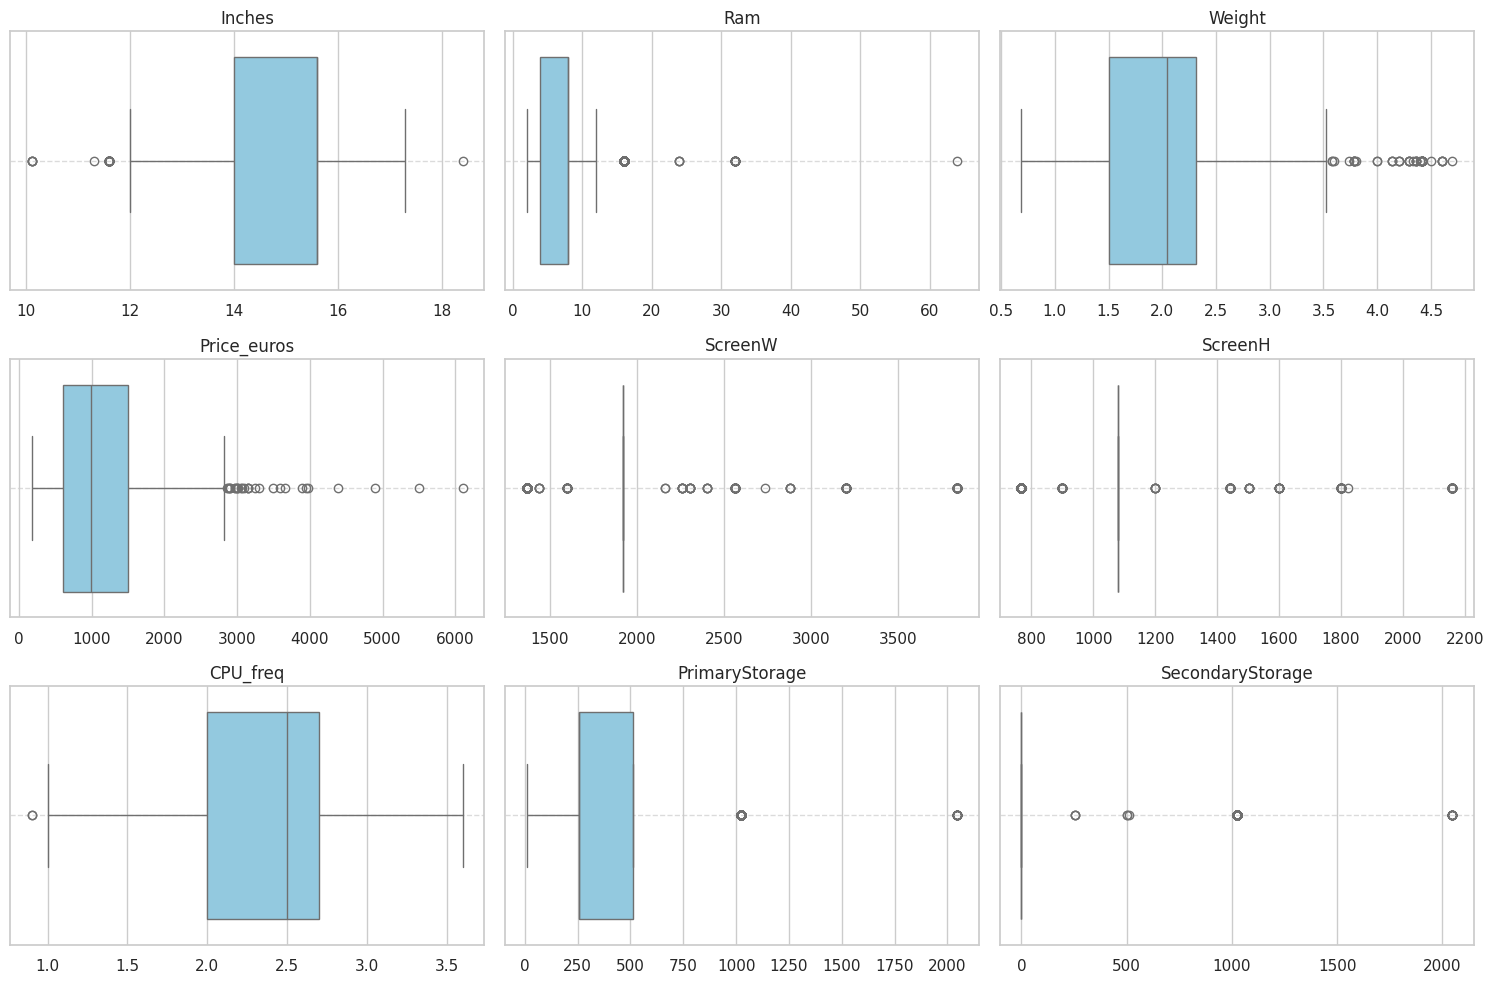

In [26]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=laptop_data, x=col, color='skyblue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


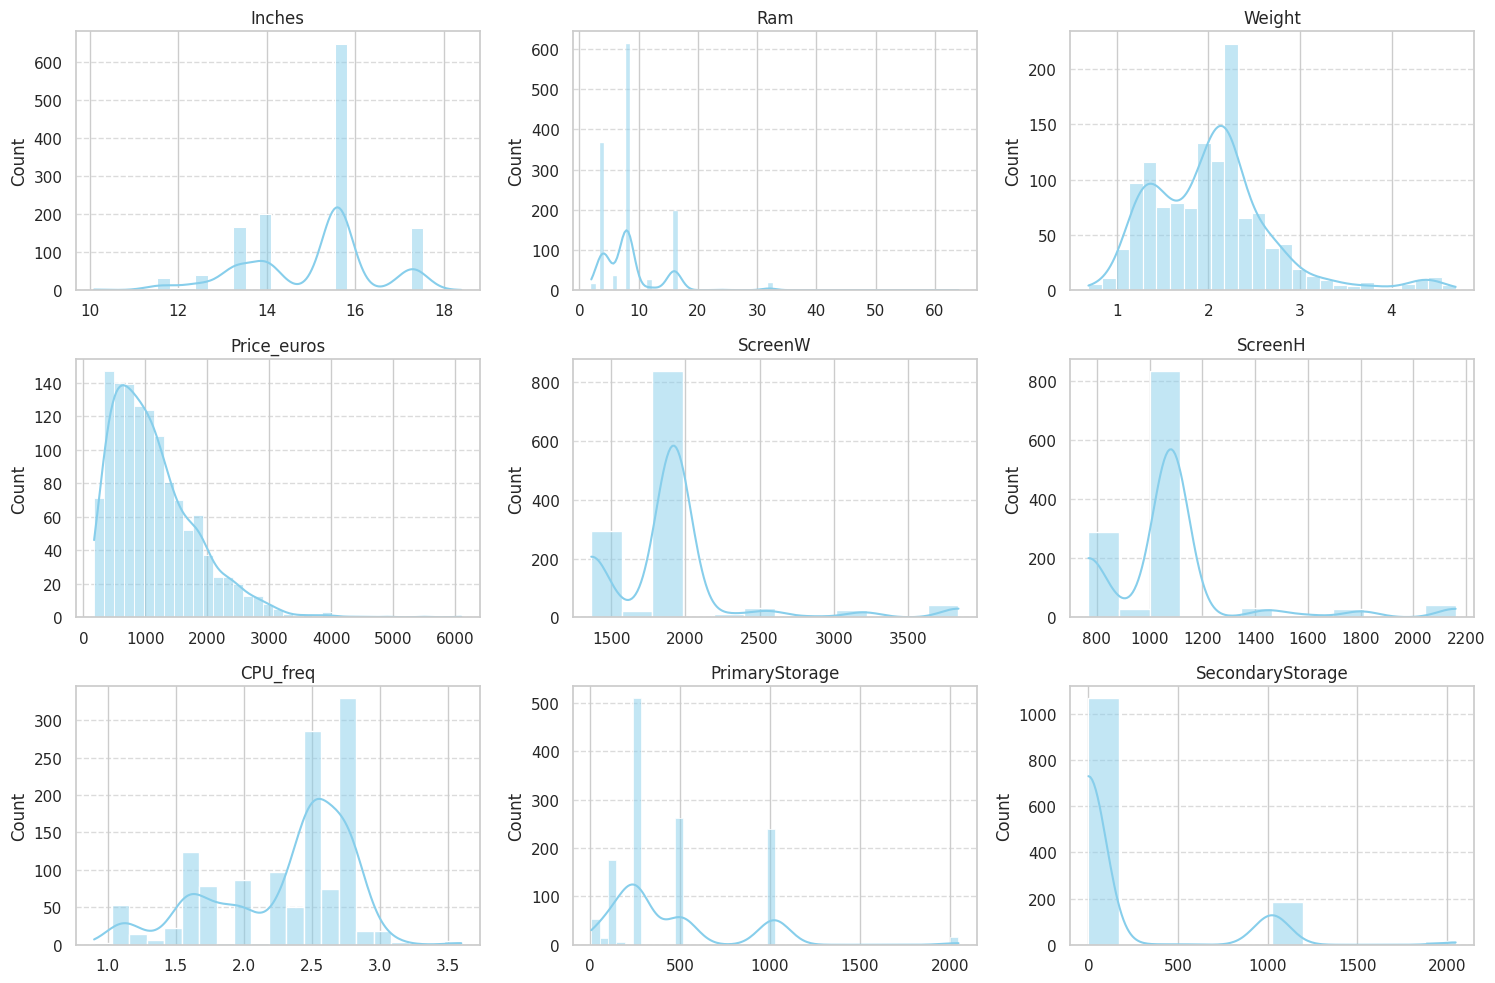

In [40]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=laptop_data, x=col, color='skyblue', kde=True)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Resumen para variables categóricas: número de valores únicos
categorical_summary = laptop_data.select_dtypes(include='object').nunique().to_frame(name='Unique Values')
categorical_summary

,Unique Values
Company,19
Product,618
TypeName,6
OS,9
Screen,4
Touchscreen,2
IPSpanel,2
RetinaDisplay,2
CPU_company,3
CPU_model,93


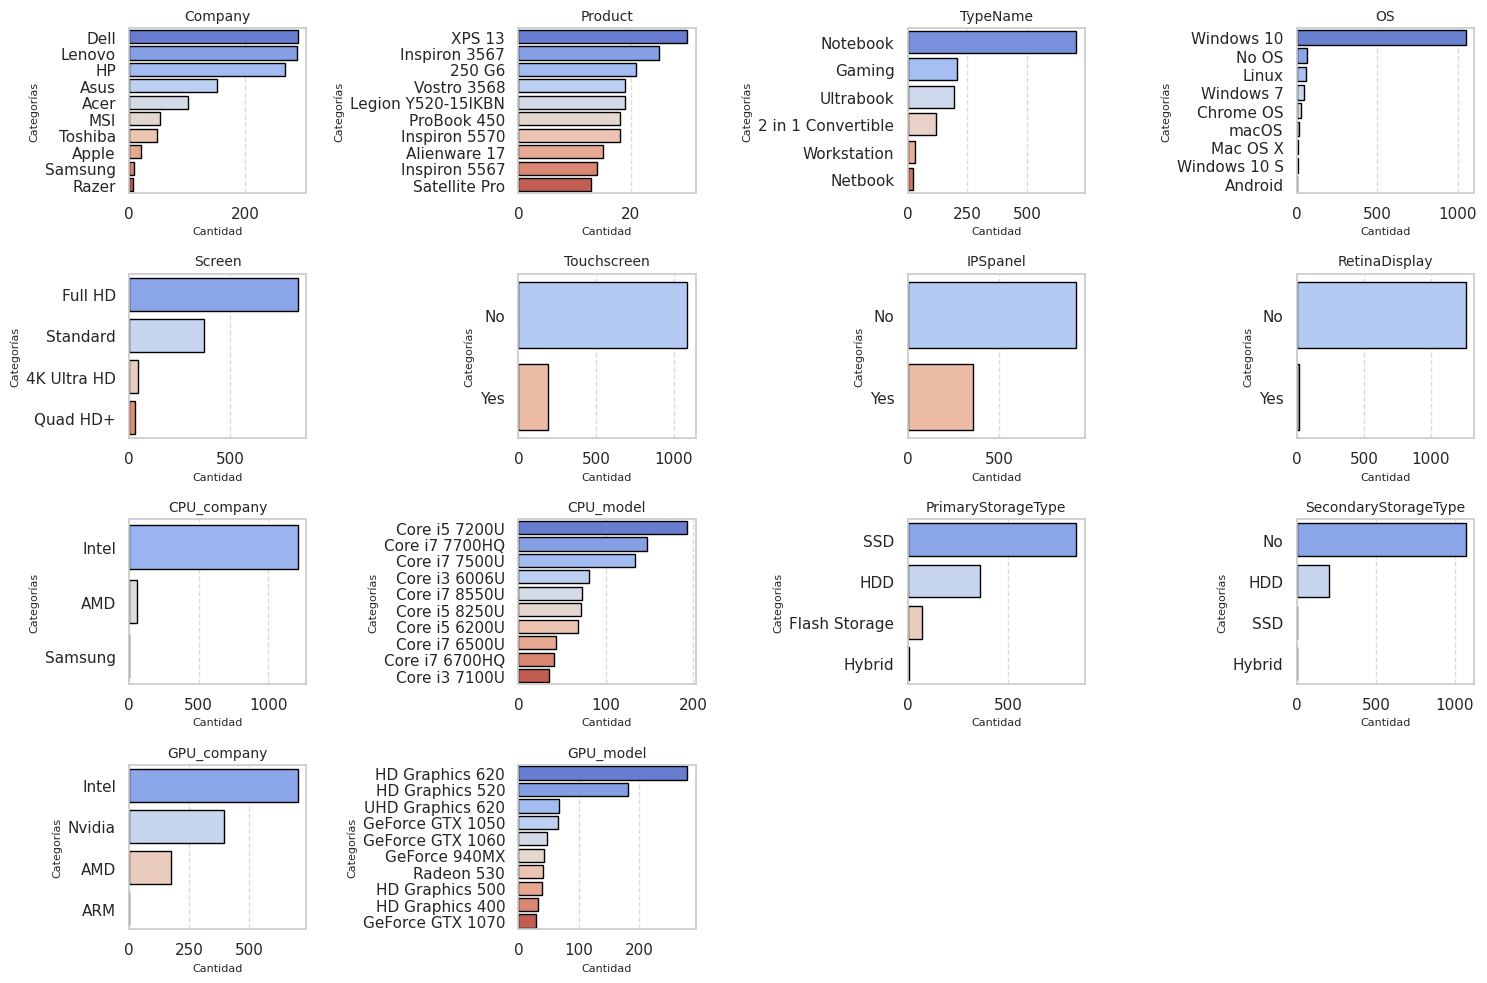

In [33]:
# Graficar los valores únicos de las columnas categóricas
categorical_columns = laptop_data.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    unique_counts = laptop_data[col].value_counts().head(10)  # Top 10 categorías
    sns.barplot(
        y=unique_counts.index, 
        x=unique_counts.values, 
        palette='coolwarm', 
        edgecolor='black', 
        hue=unique_counts.index, 
        dodge=False 
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Cantidad', fontsize=8)
    plt.ylabel('Categorías', fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
